<a href="https://colab.research.google.com/github/MichaelHalaj/Data-Science-CS301/blob/main/Assignment3_CS301.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background and Documentation
Gradient boosting is a framework for iteratively improving any weak learner. It repeatedly selects a function that leads in the direction of a negative gradient so that it can minimize a loss function.

$$
 \hat{f}(x) = f(x,\hat\theta),
$$
$$
 \hat\theta = argmin\ \mathbb{E}_{x,y}[L(y,f(x\theta)]
$$
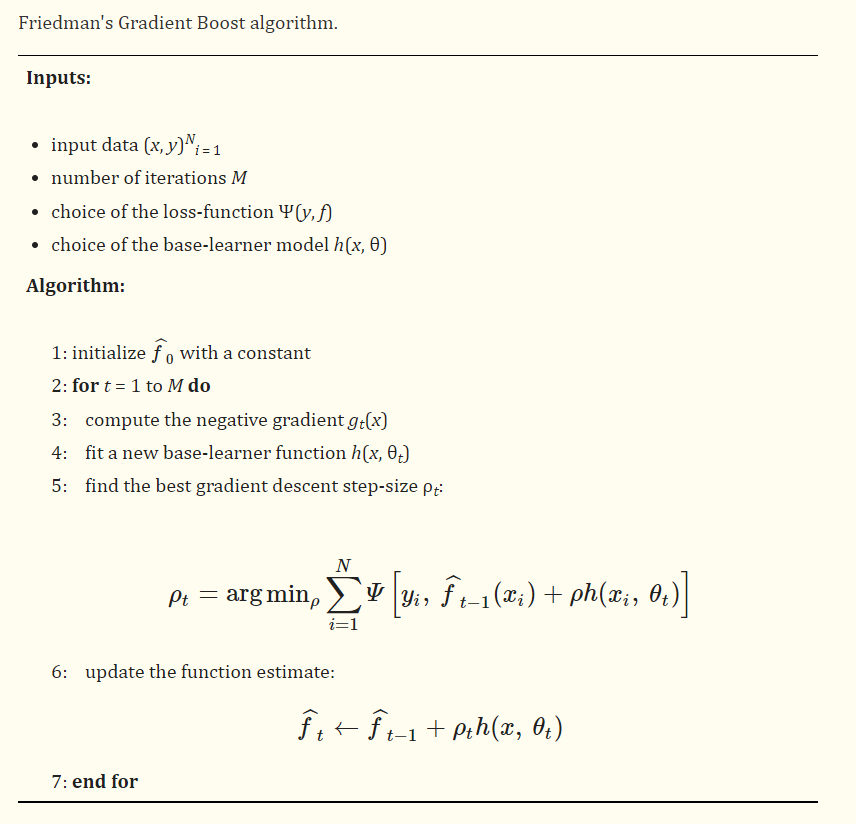

# Coding from Scratch Using JAX

Delete this after: sklearn.tree uses trees, try and figure out how to use jax's trees





In [ ]:
! git clone https://github.com/pantelis/data-science-from-scratch.git
%cd /content/data-science-from-scratch/
%env PYTHONPATH=/content/data-science-from-scratch/src:/content/data-science-from-scratch/tests:/content/data-science-from-scratch/scratch:${PYTHONPATH}


Cloning into 'data-science-from-scratch'...
remote: Enumerating objects: 404, done.
remote: Counting objects: 100% (404/404), done.
remote: Compressing objects: 100% (176/176), done.
remote: Total 404 (delta 221), reused 404 (delta 221), pack-reused 0
Receiving objects: 100% (404/404), 751.07 KiB | 2.72 MiB/s, done.
Resolving deltas: 100% (221/221), done.
/content/data-science-from-scratch
env: PYTHONPATH=/content/data-science-from-scratch/src:/content/data-science-from-scratch/tests:/content/data-science-from-scratch/scratch:${PYTHONPATH}


In [ ]:
!rm -rf /content/data-science-from-scratch/



In [ ]:
! pip install jax matplotlib seaborn jaxlib scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.2/71.2 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.3/296.3 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 81.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB

In [ ]:
import jax
import jax.numpy as jnp
from jax import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scratch import decision_trees

sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))


i = 300
M_iter = 3
#eps = 
eps = np.random.uniform(0, 0.5, i)
#eps = np.random.rand(i)
x = np.random.uniform(-5, 5, i)
#x = np.random.rand(i, 1)
y = np.cos(x) + eps
#print(y)
data = pd.DataFrame(data=np.stack([x, y], axis=1), columns=["x", "y"])
data.head()


#sns.scatterplot(x="X", y="y", data=data)
#plt.show()



level 0.6935361388961919
lang 0.8601317128547441
tweets 0.7884504573082896
phd 0.8921589282623617


,x,y
0,3.363862,-0.513396
1,1.864366,-0.080714
2,4.519912,0.142198
3,1.420792,0.275548
4,1.408453,0.435819


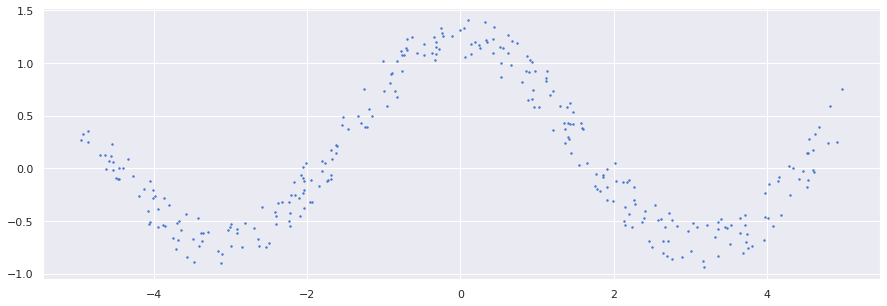

In [ ]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(5)

ax.scatter(x,y, s=2)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

tree_1 = DecisionTreeRegressor(max_depth=2)
#np.reshape(x, -1)
arr = np.array(x)
x = arr.reshape(i, 1)

tree_1.fit(x, y)
data["Tree 1 prediction"] = tree_1.predict(x)
data.head()

,x,y,Tree 1 prediction
0,3.363862,-0.513396,-0.469260
1,1.864366,-0.080714,-0.469260
2,4.519912,0.142198,0.137401
3,1.420792,0.275548,0.859655
4,1.408453,0.435819,0.859655


In [ ]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper right", fontsize=8)
    plt.axis(axes)
    plt.ylabel("$y$", fontsize=8)
    plt.xlabel("$X$", fontsize=8)

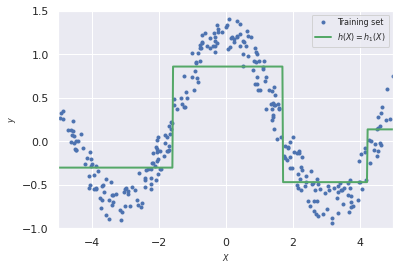

In [ ]:
plot_predictions(
    [tree_1], x, y, axes=[-5, 5, -1, 1.5], label="$h(X)=h_1(X)$", style="g-", data_label="Training set"
)
plt.show()

In [ ]:
data["Tree 1 residual"] = data["y"] - data["Tree 1 prediction"]
data.head()

,x,y,Tree 1 prediction,Tree 1 residual
0,3.363862,-0.513396,-0.469260,-0.044136
1,1.864366,-0.080714,-0.469260,0.388546
2,4.519912,0.142198,0.137401,0.004797
3,1.420792,0.275548,0.859655,-0.584107
4,1.408453,0.435819,0.859655,-0.423837


In [ ]:
tree_2 = DecisionTreeRegressor(max_depth=2)
tree_2.fit(x, data["Tree 1 residual"])

DecisionTreeRegressor(max_depth=2)

In [ ]:
data["Tree 2 prediction"] = tree_2.predict(x)
data["Tree 1 + Tree 2 prediction"] = sum(tree.predict(x) for tree in (tree_1, tree_2))
data.head();

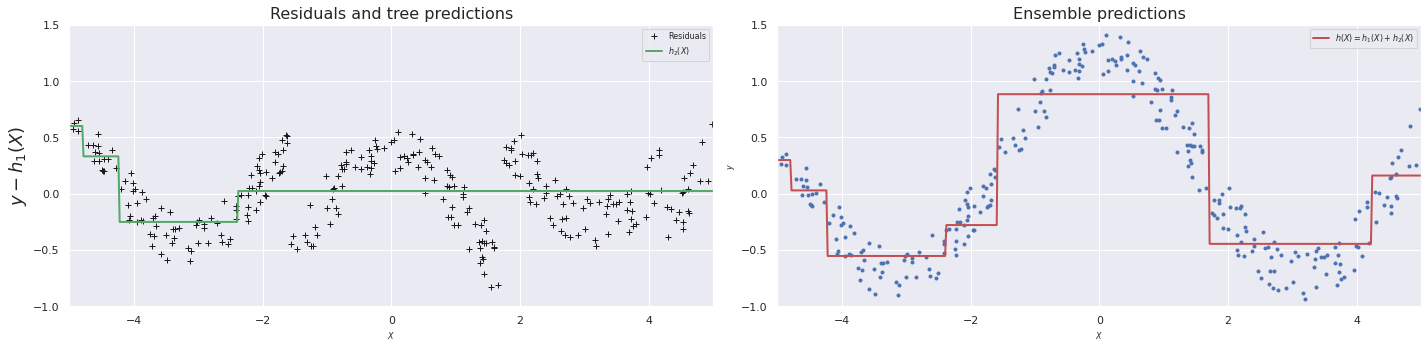

In [ ]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(20, 5))

plt.subplot(ax0)
plot_predictions(
    [tree_2],
    x,
    data["Tree 1 residual"],
    axes=[-5, 5, -1, 1.5],
        label="$h_2(X)$",
    style="g-",
    data_style="k+",
    data_label="Residuals",
)
plt.ylabel("$y - h_1(X)$", fontsize=18)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(ax1)
plot_predictions([tree_1, tree_2], x, y, axes=[-5, 5, -1, 1.5], label="$h(X) = h_1(X) + h_2(X)$")
plt.title("Ensemble predictions", fontsize=16)
plt.tight_layout()

In [ ]:
data["Tree 1 + Tree 2 residual"] = data["Tree 1 residual"] - data["Tree 2 prediction"]
data.head()

,x,y,Tree 1 prediction,Tree 1 residual,Tree 2 prediction,Tree 1 + Tree 2 prediction,Tree 1 + Tree 2 residual
0,3.363862,-0.513396,-0.469260,-0.044136,0.02357,-0.445690,-0.067706
1,1.864366,-0.080714,-0.469260,0.388546,0.02357,-0.445690,0.364976
2,4.519912,0.142198,0.137401,0.004797,0.02357,0.160972,-0.018774
3,1.420792,0.275548,0.859655,-0.584107,0.02357,0.883226,-0.607677
4,1.408453,0.435819,0.859655,-0.423837,0.02357,0.883226,-0.447407


In [ ]:
tree_3 = DecisionTreeRegressor(max_depth=2)
tree_3.fit(x, data["Tree 1 + Tree 2 residual"])

DecisionTreeRegressor(max_depth=2)

In [ ]:
data["Tree 3 prediction"] = tree_3.predict(x)
data["Tree 1 + Tree 2 + Tree 3 prediction"] = sum(tree.predict(x) for tree in (tree_1, tree_2, tree_3))
data["Final residual"] = data["Tree 1 + Tree 2 residual"] - data["Tree 3 prediction"]
data.head()

,x,y,Tree 1 prediction,Tree 1 residual,Tree 2 prediction,Tree 1 + Tree 2 prediction,Tree 1 + Tree 2 residual,Tree 3 prediction,Tree 1 + Tree 2 + Tree 3 prediction,Final residual
0,3.363862,-0.513396,-0.469260,-0.044136,0.02357,-0.445690,-0.067706,-0.023570,-0.469260,-0.044136
1,1.864366,-0.080714,-0.469260,0.388546,0.02357,-0.445690,0.364976,-0.023570,-0.469260,0.388546
2,4.519912,0.142198,0.137401,0.004797,0.02357,0.160972,-0.018774,-0.023570,0.137401,0.004797
3,1.420792,0.275548,0.859655,-0.584107,0.02357,0.883226,-0.607677,-0.333325,0.549901,-0.274353
4,1.408453,0.435819,0.859655,-0.423837,0.02357,0.883226,-0.447407,-0.333325,0.549901,-0.114082


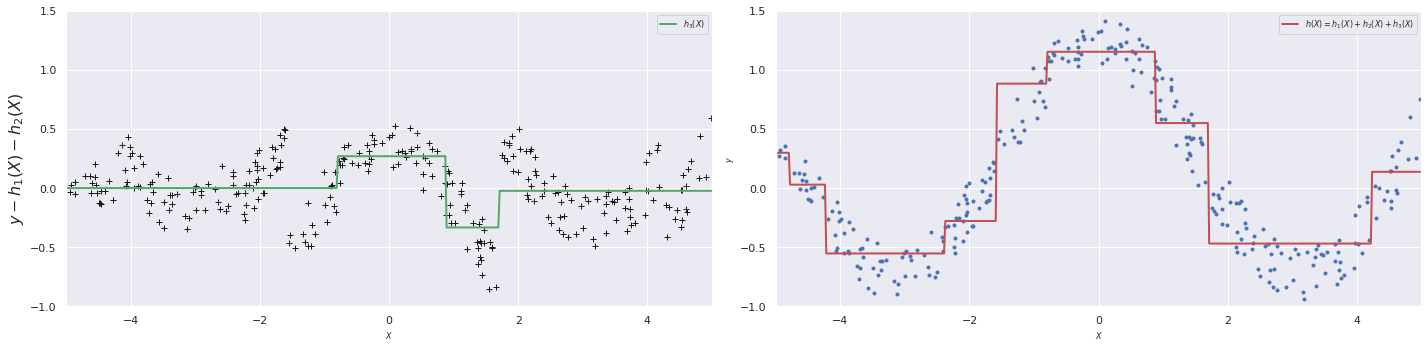

In [ ]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(20,5))
plt.subplot(ax0)
plot_predictions(
    [tree_3],
    x,
    data["Tree 1 + Tree 2 residual"],
    axes=[-5, 5, -1, 1.5],
    label="$h_3(X)$",
    style="g-",
    data_style="k+",
)
plt.ylabel("$y - h_1(X) - h_2(X)$", fontsize=16)

plt.subplot(ax1)
plot_predictions(
    [tree_1, tree_2, tree_3], x, y, axes=[-5, 5, -1, 1.5], label="$h(X) = h_1(X) + h_2(X) + h_3(X)$",
)
plt.tight_layout()

In [ ]:
gradient_boost = GradientBoostingRegressor(max_depth=2, n_estimators=5, learning_rate=1.0)
gradient_boost.fit(x,y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=5)

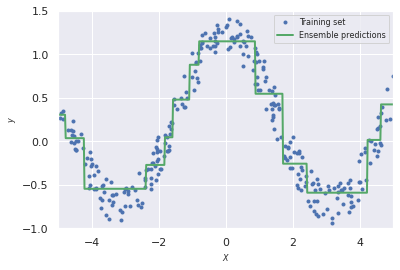

In [ ]:
plot_predictions(
    [gradient_boost], x, y, axes=[-5, 5, -1, 1.5], label="Ensemble predictions", style="g-", data_label="Training set"
)

# EMG Dataset

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!pip install unrar
!unrar x EMG\ Physical\ Action\ Data\ Set.rar

In [ ]:
!sudo apt-get update -y
!sudo apt-get install python3.9 python3.9-dev python3.9-distutils libpython3.9-dev

#change alternatives
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 2

# install pip
!curl https://bootstrap.pypa.io/get-pip.py -o get-pip.py
!python3 get-pip.py --force-reinstall

#install colab's dependencies
!python3 -m pip install ipython ipython_genutils ipykernel jupyter_console prompt_toolkit httplib2 astor

# link to the old google package
!ln -s /usr/local/lib/python3.7/dist-packages/google \
       /usr/local/lib/python3.9/dist-packages/google

In [ ]:
! pip install pandas==1.5.0

In [ ]:
!python --version

Python 3.9.15


In [ ]:
import pandas as pd
#import jax
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
aggressive = ["Elbowing",
         "Frontkicking", 
         "Hamering", 
         "Headering", 
         "Kneeing", 
         "Pulling", 
         "Punching", 
         "Pushing",
         "Sidekicking",
         "Slapping"]
normal = ["Bowing",
         "Clapping",
         "Handshaking",
         "Hugging",
         "Jumping",
         "Running",
         "Seating",
         "Standing",
         "Walking",
         "Waving"]
subclass = ["Aggressive", "Normal"]
df = pd.DataFrame()

df1 = pd.DataFrame(columns=aggressive+normal)
#print(df1)
maxdf = pd.DataFrame()
for i in range(1, 5):
  for activity in aggressive:
    temp = pd.read_csv(f'/content/EMG Physical Action Data Set/sub{i}/Aggressive/txt/{activity}.txt', sep='\t', header=None)
    temp = temp.abs()
    maxtemp = df1[activity]
    combine = pd.concat([maxtemp, temp], axis=1, join='outer')
    df1[activity] = combine.max(axis=1)
   # df1[activity] = temp.max(axis=1)
    
    
    max = temp.max(axis=1)
    #print(max)
    maxdf = pd.concat([maxdf, max], axis=1, join='outer')
    df = pd.concat([df, temp], axis=1, join='outer')
  for activity in normal:
    temp = pd.read_csv(f'/content/EMG Physical Action Data Set/sub{i}/Normal/txt/{activity}.txt', sep='\t', header=None)
    temp = temp.abs()
    maxtemp = df1[activity]
    combine = pd.concat([maxtemp, temp], axis=1, join='outer')
    df1[activity] = combine.max(axis=1)

    max = temp.max(axis=1)
    maxdf = pd.concat([maxdf, max], axis=1, join='outer')
    df = pd.concat([df, temp], axis=1, join='outer')
#processed = maxdf.rolling(window=10, min)
df = df.abs()
processed = df1.rolling(window=10, min_periods=1, step=10).mean()
#processed = df
processed.dropna(inplace=True)
print(processed)
df.dropna(inplace=True)

#print(df1)
#print(df)
#df = pd.read_csv('/content/EMG Physical Action Data Set/sub1/Aggressive/txt/Elbowing.txt', sep='\t', header=None)
#df2 = pd.read_csv('/content/EMG Physical Action Data Set/sub1/Normal/txt/Bowing.txt', sep='\t', header=None)
#maxdf.dropna(inplace=True)
#print(maxdf)
#df.head()
#print(df)
#print(processed)
#plt.scatter(df.index, df[0])
#avg = df[0].rolling(window=10, min_periods=1, step=10).mean()
#avg.dropna(inplace=True)
#plt.scatter(avg.index, avg[0])
#print(avg)
#print(df2)

      Elbowing  Frontkicking  Hamering  Headering  Kneeing  Pulling  Punching  \
0       4000.0        4000.0    4000.0     2153.0   4000.0   4000.0    4000.0   
10      4000.0        4000.0    4000.0     3433.7   4000.0   4000.0    4000.0   
20      4000.0        4000.0    4000.0     4000.0   4000.0   4000.0    4000.0   
30      4000.0        4000.0    4000.0     3932.3   4000.0   4000.0    4000.0   
40      4000.0        3385.3    4000.0     3560.5   4000.0   4000.0    4000.0   
...        ...           ...       ...        ...      ...      ...       ...   
9730    4000.0        4000.0    4000.0     3663.2   4000.0   1852.7    4000.0   
9740    4000.0        3418.2    4000.0     3634.6   4000.0   1355.6    4000.0   
9750    4000.0        2312.7    3932.5     3136.8   4000.0   1113.3    3943.3   
9760    4000.0        4000.0    3392.8     3928.5   4000.0   2497.8    3934.5   
9770    3677.9        4000.0    3686.7     4000.0   4000.0   2292.0    4000.0   

      Pushing  Sidekicking 

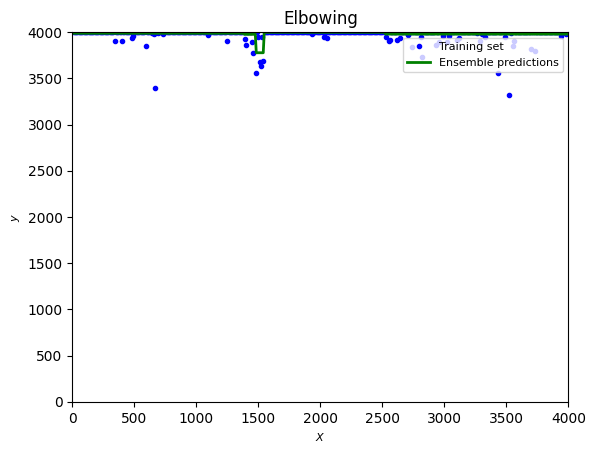

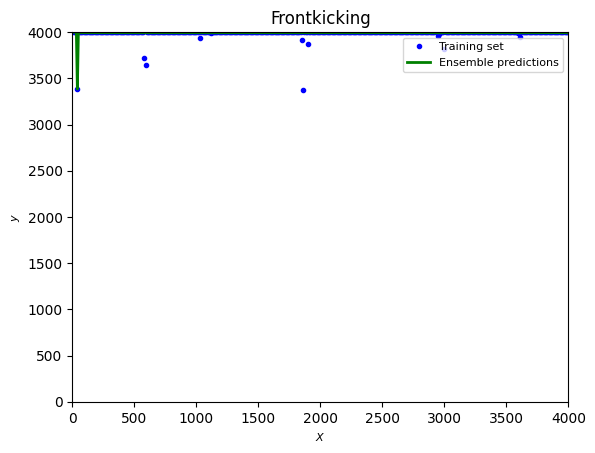

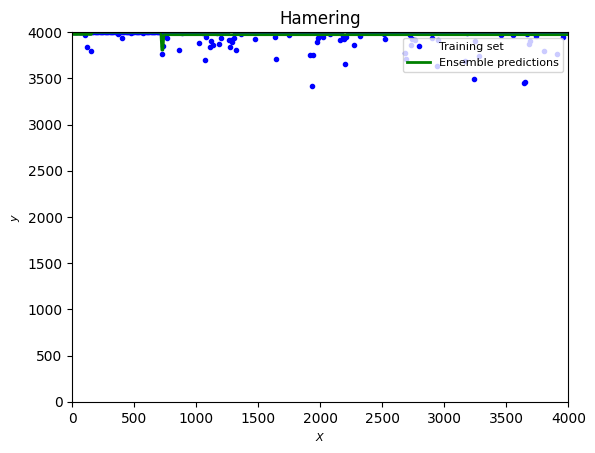

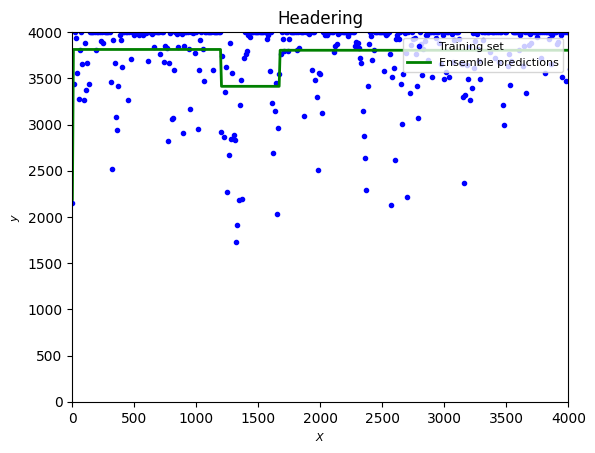

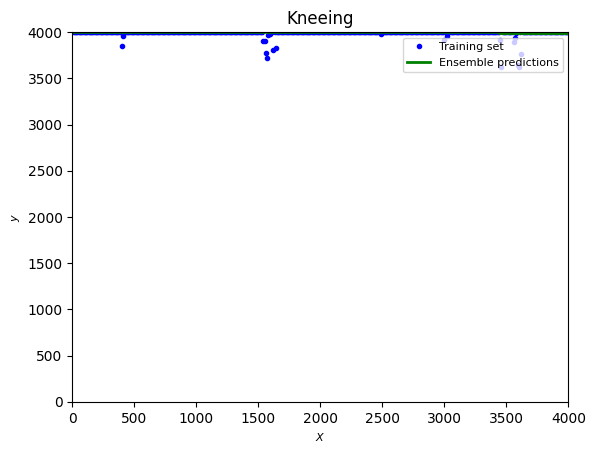

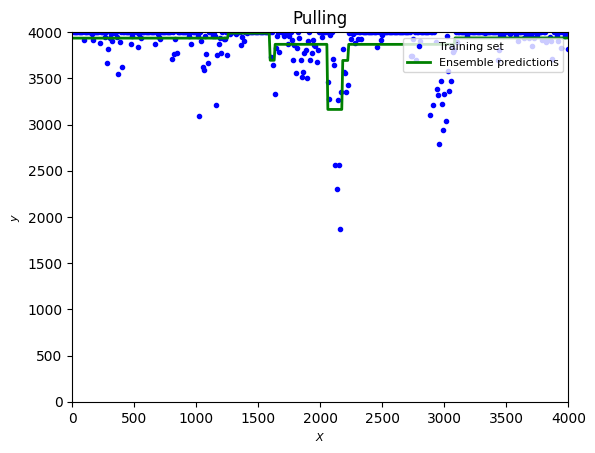

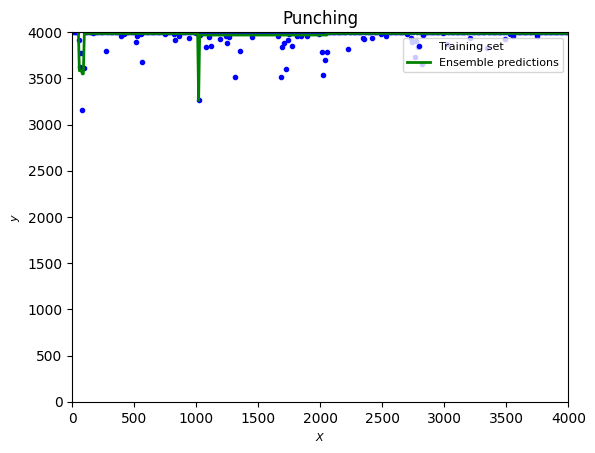

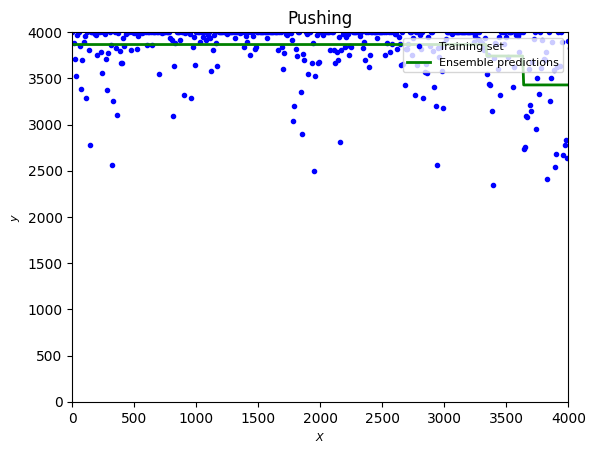

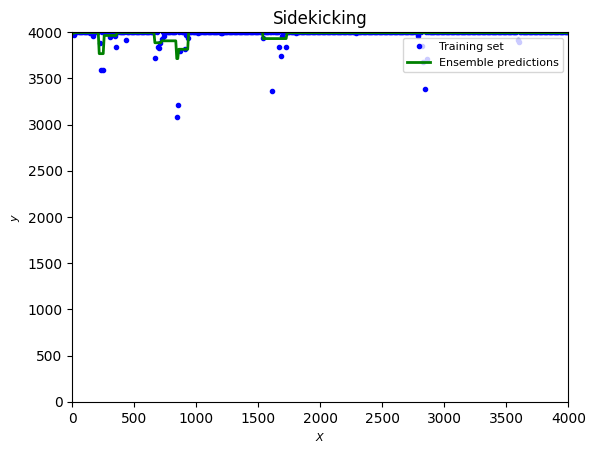

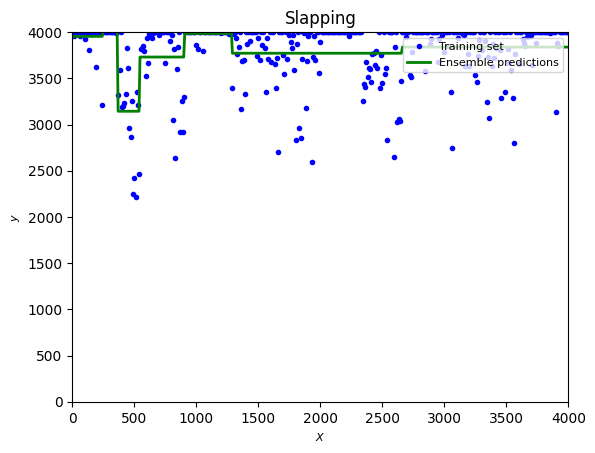

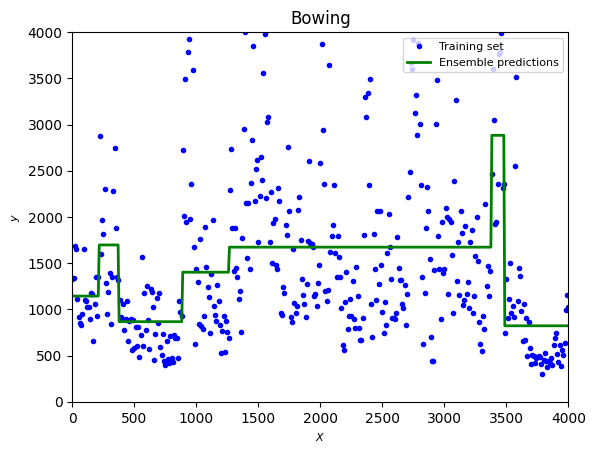

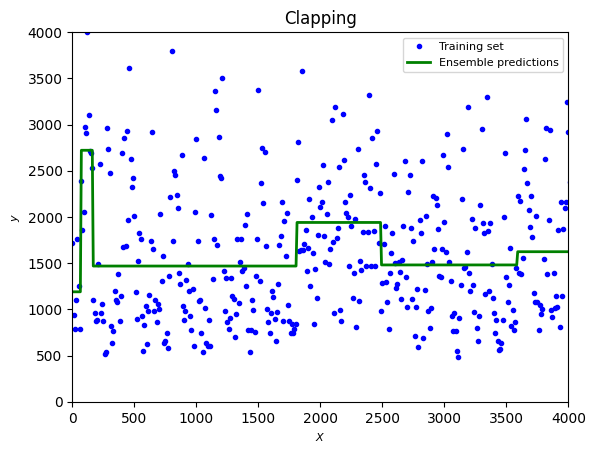

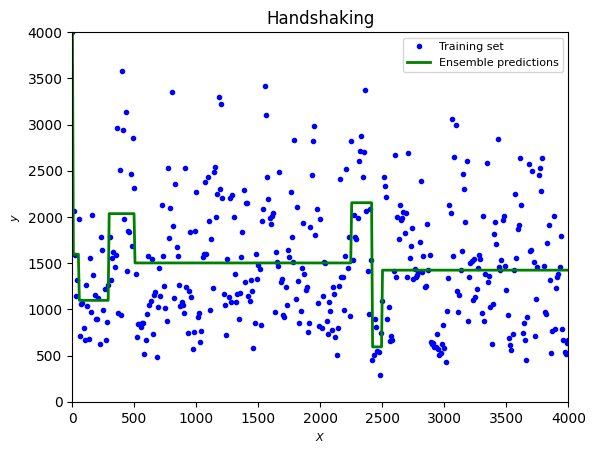

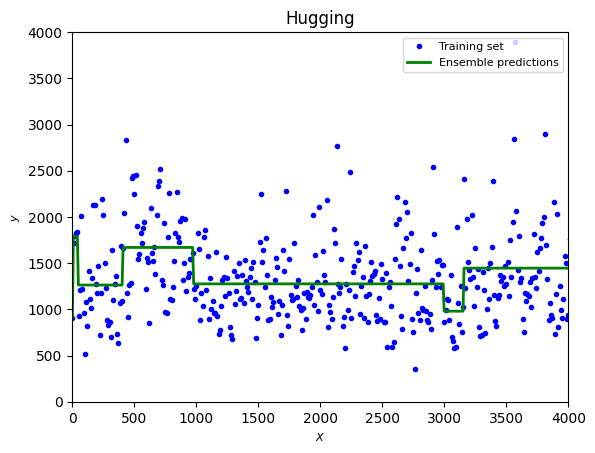

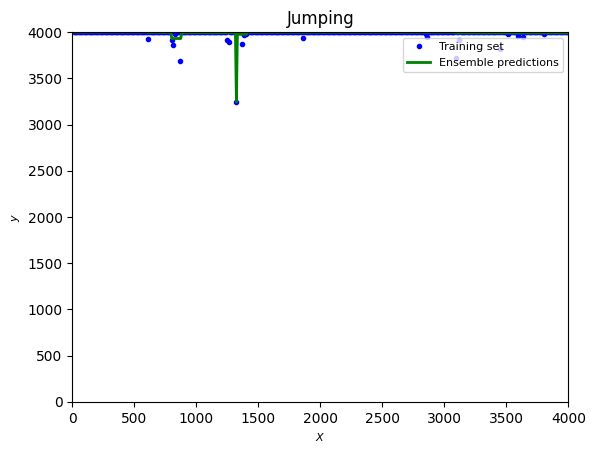

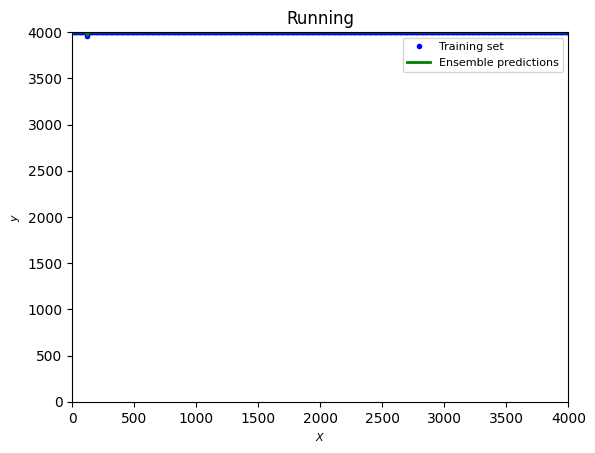

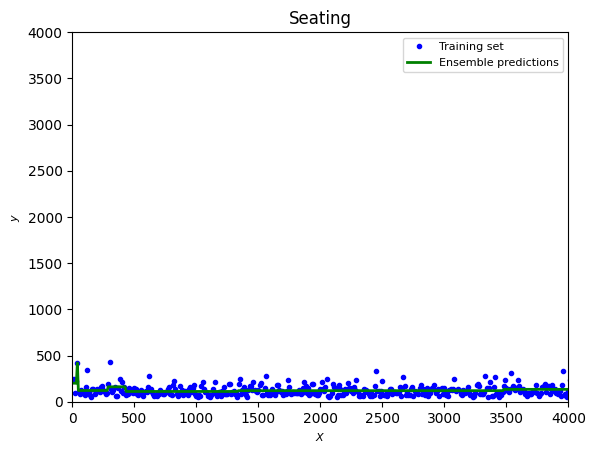

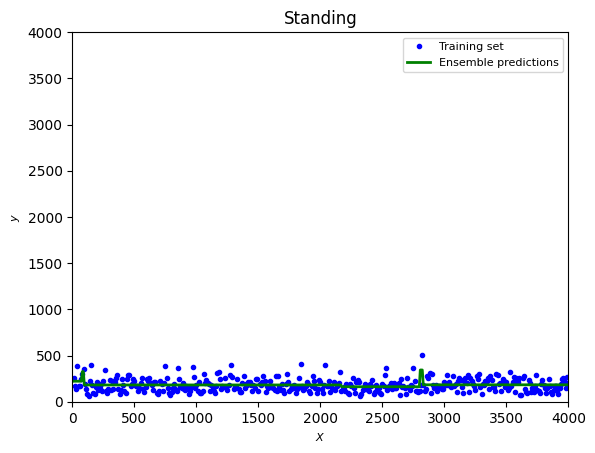

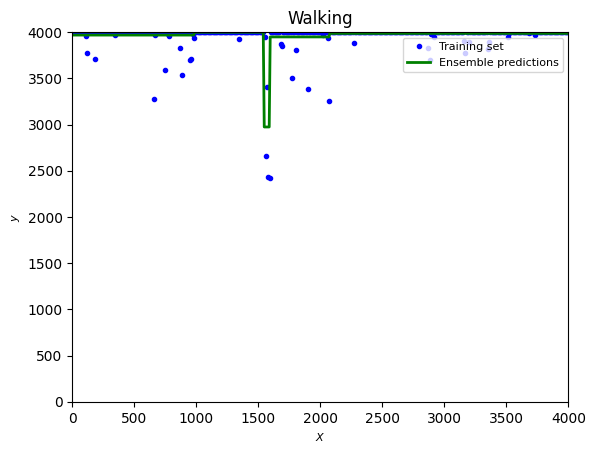

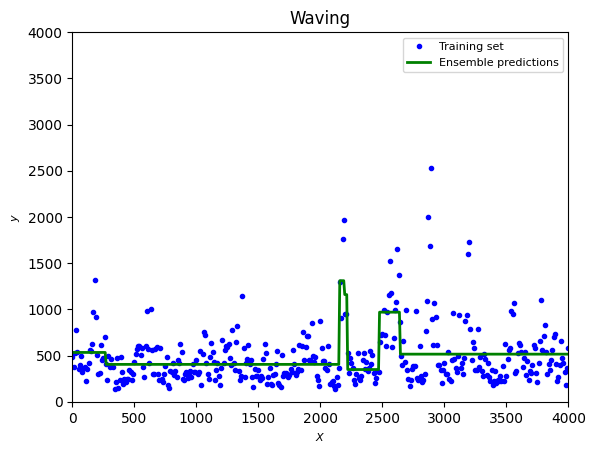

In [ ]:
import numpy as np
#fig, (a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20) = plt.subplots(20)


for y in aggressive + normal:
  gradient_boost = GradientBoostingRegressor(max_depth=2, n_estimators=5, learning_rate=1.0)
  arr = np.array(processed.index)
  x = arr.reshape(len(processed.index), 1)
  #print(processed.index)
  gradient_boost.fit(x,processed[y])
  #plt.subplot(a1)
  fig, axs = plt.subplots()
  plot_predictions(
    [gradient_boost], x, processed[y], axes=[0, 4000, 0, 4000], label="Ensemble predictions", style="g-", data_label="Training set"
  )
  plt.title(y)
  